<a href="https://colab.research.google.com/github/abhishek100595/Digit_recognizer_MNIST/blob/master/MNIST_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

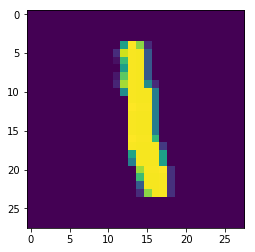

In [54]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(training_images[6])

In [55]:
training_images=tf.keras.utils.normalize(training_images,axis=1)
test_images=tf.keras.utils.normalize(test_images,axis=1)
print("train:shape ",training_images.shape)
print("test:shape ",test_images.shape)
#training_images= training_images.reshape((-1, 100, 100, 1))

train:shape  (60000, 28, 28)
test:shape  (10000, 28, 28)


In [0]:
model=tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [57]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2641 - acc: 0.9239
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1073 - acc: 0.9672
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0734 - acc: 0.9765
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0549 - acc: 0.9827
Epoch 5/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0411 - acc: 0.9867


In [58]:

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

10000/10000 [==============================] - 0s 38us/sample - loss: 0.0937 - acc: 0.9717
Test loss: 0.09374145055841654, Test accuracy: 97.17000126838684


In [0]:
model.save('digit_recognizer.model')

In [62]:
new_model = tf.keras.models.load_model('digit_recognizer.model')
predictions = new_model.predict(test_images)

In [68]:
np.argmax(predictions[99])

9

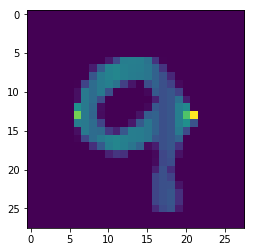

In [69]:
plt.imshow(test_images[99])